<a href="https://colab.research.google.com/github/prateekbps/DataScience/blob/main/Vehicle_Classification_(Final_Completed).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 1. Loading the dataset
# 2. Pre-processing the data
# 3. Creating training and validation set
# 4. Defining the model architecture
# 5. Compiling the model
# 6. Training the model
# 7. Evaluating model performance

In [2]:

import numpy as np
import pandas as pd
from glob import glob
import matplotlib.pyplot as plt
%matplotlib inline

from keras.layers import Dense, InputLayer
from keras.models import Sequential

from sklearn.model_selection import train_test_split

In [3]:
# !unzip /content/drive/MyDrive/Advanced_AI_Data/images.zip

In [4]:
# Preprocessing the data

In [5]:
data = pd.read_csv('/content/drive/MyDrive/Advanced_AI_Data/emergency_classification.csv')

In [6]:
seed = 42
rng = np.random.RandomState(seed)

In [7]:
data.head()

,image_names,emergency_or_not
0,0.jpg,1
1,1.jpg,1
2,2.jpg,1
3,3.jpg,1
4,4.jpg,1


In [8]:
data['emergency_or_not'].value_counts()

,count
emergency_or_not,
0,1361
1,991


In [9]:
X = []
for img_name in data.image_names:
    img = plt.imread('/content/images/' + img_name)
    X.append(img)

X=np.array(X)
y = data.emergency_or_not.values

In [10]:
X.shape

(2352, 224, 224, 3)

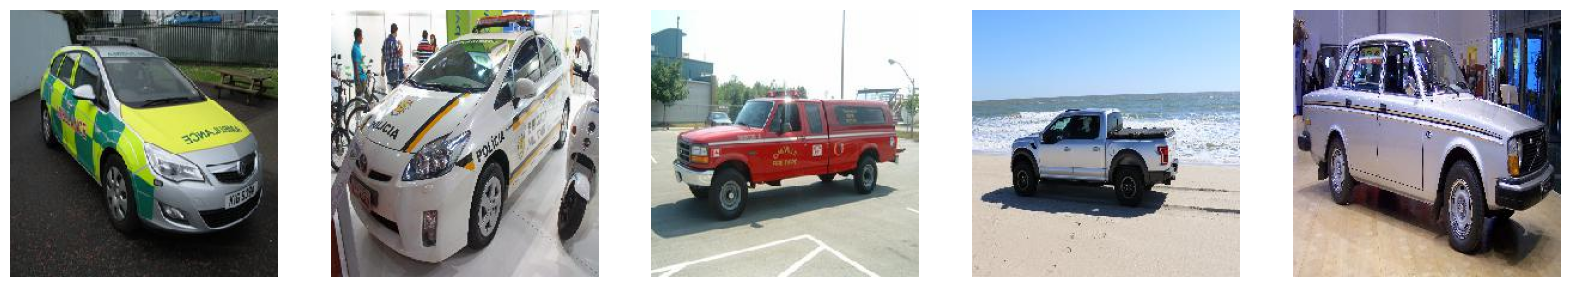

In [11]:
fig,ax = plt.subplots(nrows=1,ncols=5,figsize=(20,20))
for i in range(5):
    ax[i].imshow(X[i*400])
    ax[i].axis('off')

In [12]:
X = X.reshape(X.shape[0], 224*224*3)
X.shape

(2352, 150528)

In [13]:

X.min(), X.max()

# normalize
X = X / X.max()

In [14]:
X.min(), X.max()

(0.0, 1.0)

In [15]:
X_train, X_valid, y_train, y_valid=train_test_split(X,y,test_size=0.3, random_state=seed)

In [16]:
(X_train.shape, y_train.shape), (X_valid.shape, y_valid.shape)

(((1646, 150528), (1646,)), ((706, 150528), (706,)))

In [17]:
model=Sequential()
model.add(InputLayer(input_shape=(X_train.shape[1],)))
model.add(Dense(100, activation='sigmoid'))
model.add(Dense(units=1, activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [18]:

model.compile(loss='binary_crossentropy', optimizer="sgd", metrics=['accuracy'])

In [22]:
# 15 epoch already done(Giving 70 % plus accuracy only with 20 epochs)
model_history = model.fit(X_train, y_train, epochs=5, batch_size=128,validation_data=(X_valid,y_valid))

Epoch 1/5
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 230ms/step - accuracy: 0.7240 - loss: 0.5454 - val_accuracy: 0.7068 - val_loss: 0.5565
Epoch 2/5
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 78ms/step - accuracy: 0.7351 - loss: 0.5363 - val_accuracy: 0.6941 - val_loss: 0.5586
Epoch 3/5
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 73ms/step - accuracy: 0.7440 - loss: 0.5324 - val_accuracy: 0.7025 - val_loss: 0.5632
Epoch 4/5
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 79ms/step - accuracy: 0.7318 - loss: 0.5284 - val_accuracy: 0.7082 - val_loss: 0.5661
Epoch 5/5
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 80ms/step - accuracy: 0.7498 - loss: 0.5226 - val_accuracy: 0.7011 - val_loss: 0.5529


In [ ]:
# Hyperparameter tuning of neural networks
# 1. change activation function of hidden layer
# 2. increase hidden neurons
# 3. increase hidden layers
# 4. increase number of epochs
# 5. change optimizer